# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
Iris_df = pd.read_csv("iris.csv")
Iris_df.sample(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
41,42,4.5,2.3,1.3,0.3,Iris-setosa
137,138,6.4,3.1,5.5,1.8,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
13,14,4.3,3.0,1.1,0.1,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
141,142,6.9,3.1,5.1,2.3,Iris-virginica
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [16]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
print(Iris_df.isnull().sum(axis=0))

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


Fill missing values with median of that particular column

In [18]:
Iris_df["SepalLengthCm"] = Iris_df.fillna(Iris_df["SepalLengthCm"].median())
Iris_df["SepalWidthCm"] = Iris_df.fillna(Iris_df["SepalWidthCm"].median())
Iris_df["PetalLengthCm"] = Iris_df.fillna(Iris_df["PetalLengthCm"].median())
Iris_df["PetalWidthCm"] = Iris_df.fillna(Iris_df["PetalWidthCm"].median())
print(Iris_df.isnull().sum(axis=0))

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [19]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
Iris_df["Species"] = labelEncoder.fit_transform(Iris_df["Species"])

In [20]:
Iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,1,1,1,1,0
1,2,2,2,2,2,0
2,3,3,3,3,3,0
3,4,4,4,4,4,0
4,5,5,5,5,5,0


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [21]:
iris_df1 = Iris_df.drop("Species", axis=1)
iris_df2 = Iris_df["Species"]

In [22]:
iris_df1["SepalLengthCm"] = iris_df1["SepalLengthCm"].astype(float)
iris_df1["SepalWidthCm"] = iris_df1["SepalWidthCm"].astype(float)
iris_df1["PetalLengthCm"] = iris_df1["PetalLengthCm"].astype(float)
iris_df1["PetalWidthCm"] = iris_df1["PetalWidthCm"].astype(float)

In [23]:
iris_df1.corrwith(iris_df2,axis=0)

Id               0.942753
SepalLengthCm    0.942753
SepalWidthCm     0.942753
PetalLengthCm    0.942753
PetalWidthCm     0.942753
dtype: float64

In [24]:
iris_df1.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.0,1.0,1.0,1.0,1.0
SepalLengthCm,1.0,1.0,1.0,1.0,1.0
SepalWidthCm,1.0,1.0,1.0,1.0,1.0
PetalLengthCm,1.0,1.0,1.0,1.0,1.0
PetalWidthCm,1.0,1.0,1.0,1.0,1.0


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [25]:
Iris_df.var()

Id               1938.000000
SepalLengthCm    1938.000000
SepalWidthCm     1938.000000
PetalLengthCm    1938.000000
PetalWidthCm     1938.000000
Species             0.675322
dtype: float64

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

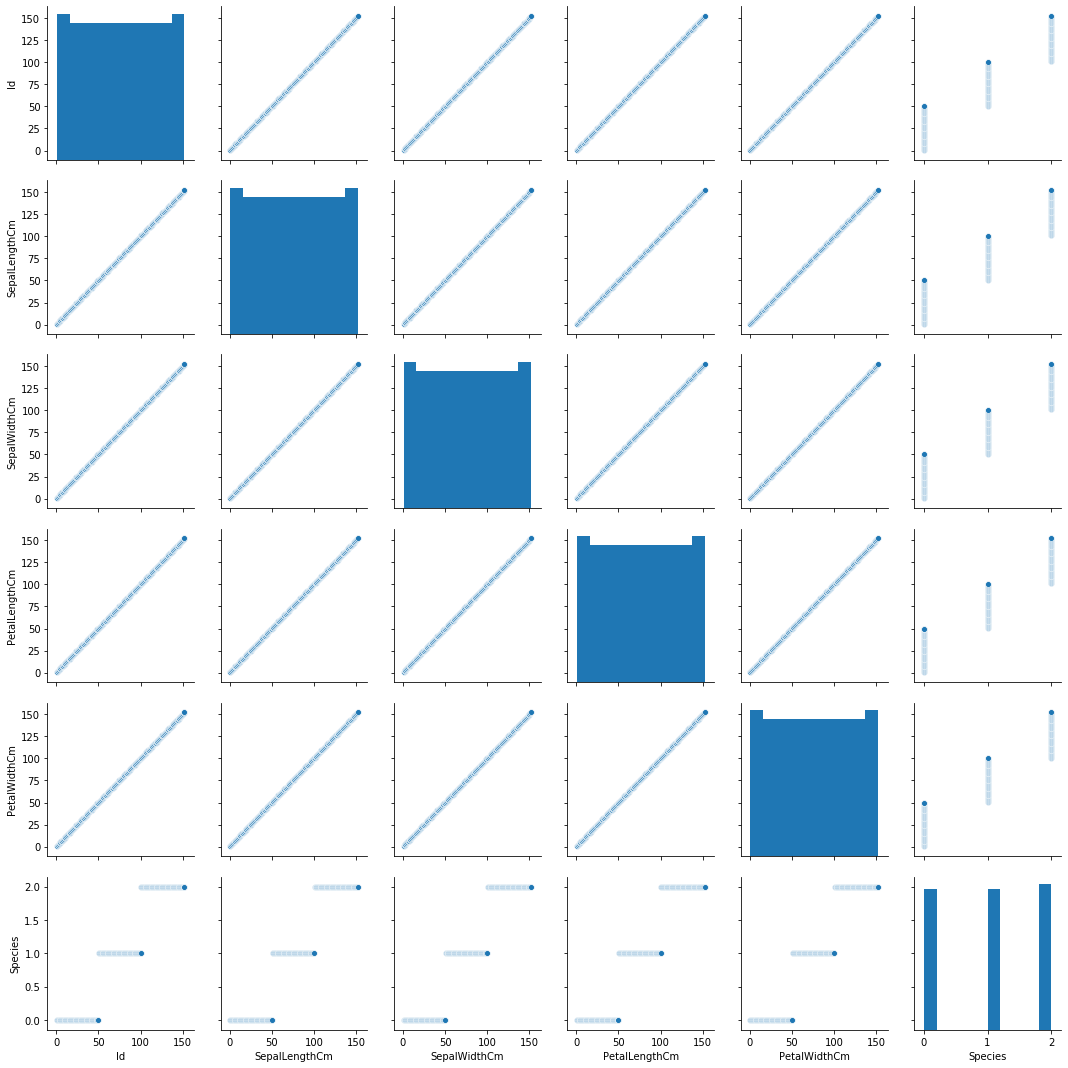

In [26]:
sns.pairplot(Iris_df)

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [27]:
X_iris = Iris_df.drop(['Species'], axis = 1)
y_iris = Iris_df["Species"]
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.20,random_state=1)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [28]:
k_list = [3,5,9]
for k in k_list:
    X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.20,random_state=1)
    sc=StandardScaler()
    X_train_scaled_Iris = sc.fit_transform(X_train_iris)
    X_test_scaled_Iris = sc.transform(X_test_iris)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_scaled_Iris,y_train_iris)
    
    y_pred_iris = knn.predict(X_test_scaled_Iris)
    print("K: {}, Test Accuracy Score: {}".format(k,accuracy_score(y_test_iris, y_pred_iris)))

K: 3, Test Accuracy Score: 1.0
K: 5, Test Accuracy Score: 0.967741935483871
K: 9, Test Accuracy Score: 0.9354838709677419


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [29]:
PlotTrain = []
PlotTest = []
neighbors = []
train_accuracyIris = {}
test_accuracyIris = {}
for k in range(1,20):
    if k%2 !=0:
        X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.20,random_state=1)
        sc=StandardScaler()
        X_train_scaled_iris = sc.fit_transform(X_train_iris)
        X_test_scaled_iris = sc.transform(X_test_iris)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn = knn.fit(X_train_scaled_iris,y_train_iris)
        y_pred_iris = knn.predict(X_test_scaled_iris)
        
        train_accuracyIris[k] = knn.score(X_train_scaled_iris,y_train_iris)
        test_accuracyIris[k] = accuracy_score(y_test_iris, y_pred_iris)
        print("K= {}, Traning Accuracy: {}, Test Accuracy: {}".format(k, knn.score(X_train_scaled_iris,y_train_iris), accuracy_score(y_test_iris, y_pred_iris)))
        
        #Add to list
        #Compute accuracy on the training set
        PlotTrain.insert(k, knn.score(X_train_scaled_iris,y_train_iris))
        #Compute accuracy on the testing set
        PlotTest.insert(k,accuracy_score(y_test_iris, y_pred_iris))
        neighbors.append(k)

K= 1, Traning Accuracy: 1.0, Test Accuracy: 1.0
K= 3, Traning Accuracy: 1.0, Test Accuracy: 1.0
K= 5, Traning Accuracy: 1.0, Test Accuracy: 0.967741935483871
K= 7, Traning Accuracy: 0.9834710743801653, Test Accuracy: 0.967741935483871
K= 9, Traning Accuracy: 0.9834710743801653, Test Accuracy: 0.9354838709677419
K= 11, Traning Accuracy: 0.9834710743801653, Test Accuracy: 0.967741935483871
K= 13, Traning Accuracy: 0.9917355371900827, Test Accuracy: 0.967741935483871
K= 15, Traning Accuracy: 0.9917355371900827, Test Accuracy: 0.967741935483871
K= 17, Traning Accuracy: 0.9917355371900827, Test Accuracy: 0.967741935483871
K= 19, Traning Accuracy: 0.9917355371900827, Test Accuracy: 0.9354838709677419


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

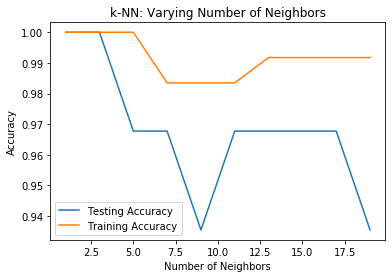

In [30]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, PlotTest, label = 'Testing Accuracy')
plt.plot(neighbors, PlotTrain, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [31]:
bc_df = pd.read_csv("bc2.csv")
bc_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [32]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [33]:
bc_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [34]:
bc_df.isnull().sum(axis=0)
# NO missing value present

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [35]:
bc_df[bc_df["Bare Nuclei"] == "?"].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [36]:
modeval = bc_df["Bare Nuclei"].mode()
type(modeval)

pandas.core.series.Series

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [37]:
#bc_df["Bare Nuclei"] = bc_df["Bare Nuclei"].replace(to_replace = "?", value=modeval, inplace = True)
bc_df["Bare Nuclei"].replace(to_replace = "?", value=1, inplace = True)

In [38]:
bc_df[bc_df["Bare Nuclei"] == "?"].count()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [39]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 5
#### Find the distribution of target variable (Class) 

In [40]:
bc_df["Class"].describe()

count    699.000000
mean       2.689557
std        0.951273
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Class, dtype: float64

In [41]:
print(bc_df["Class"].unique())
print(bc_df["Class"].value_counts())

[2 4]
2    458
4    241
Name: Class, dtype: int64


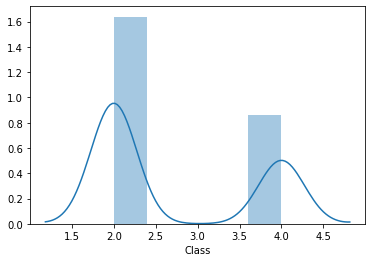

In [42]:

sns.distplot(bc_df["Class"], kde=True, label=True, bins=5)

#### Plot the distribution of target variable using histogram

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
        3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 <a list of 20 Patch objects>)

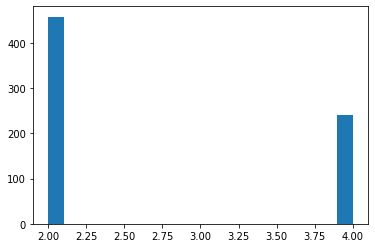

In [43]:
plt.hist(bc_df["Class"], bins=20)

#### Convert the datatype of Bare Nuclei to `int`

In [44]:
bc_df["Bare Nuclei"] = bc_df["Bare Nuclei"].astype(int)
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

In [45]:
bc_df.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

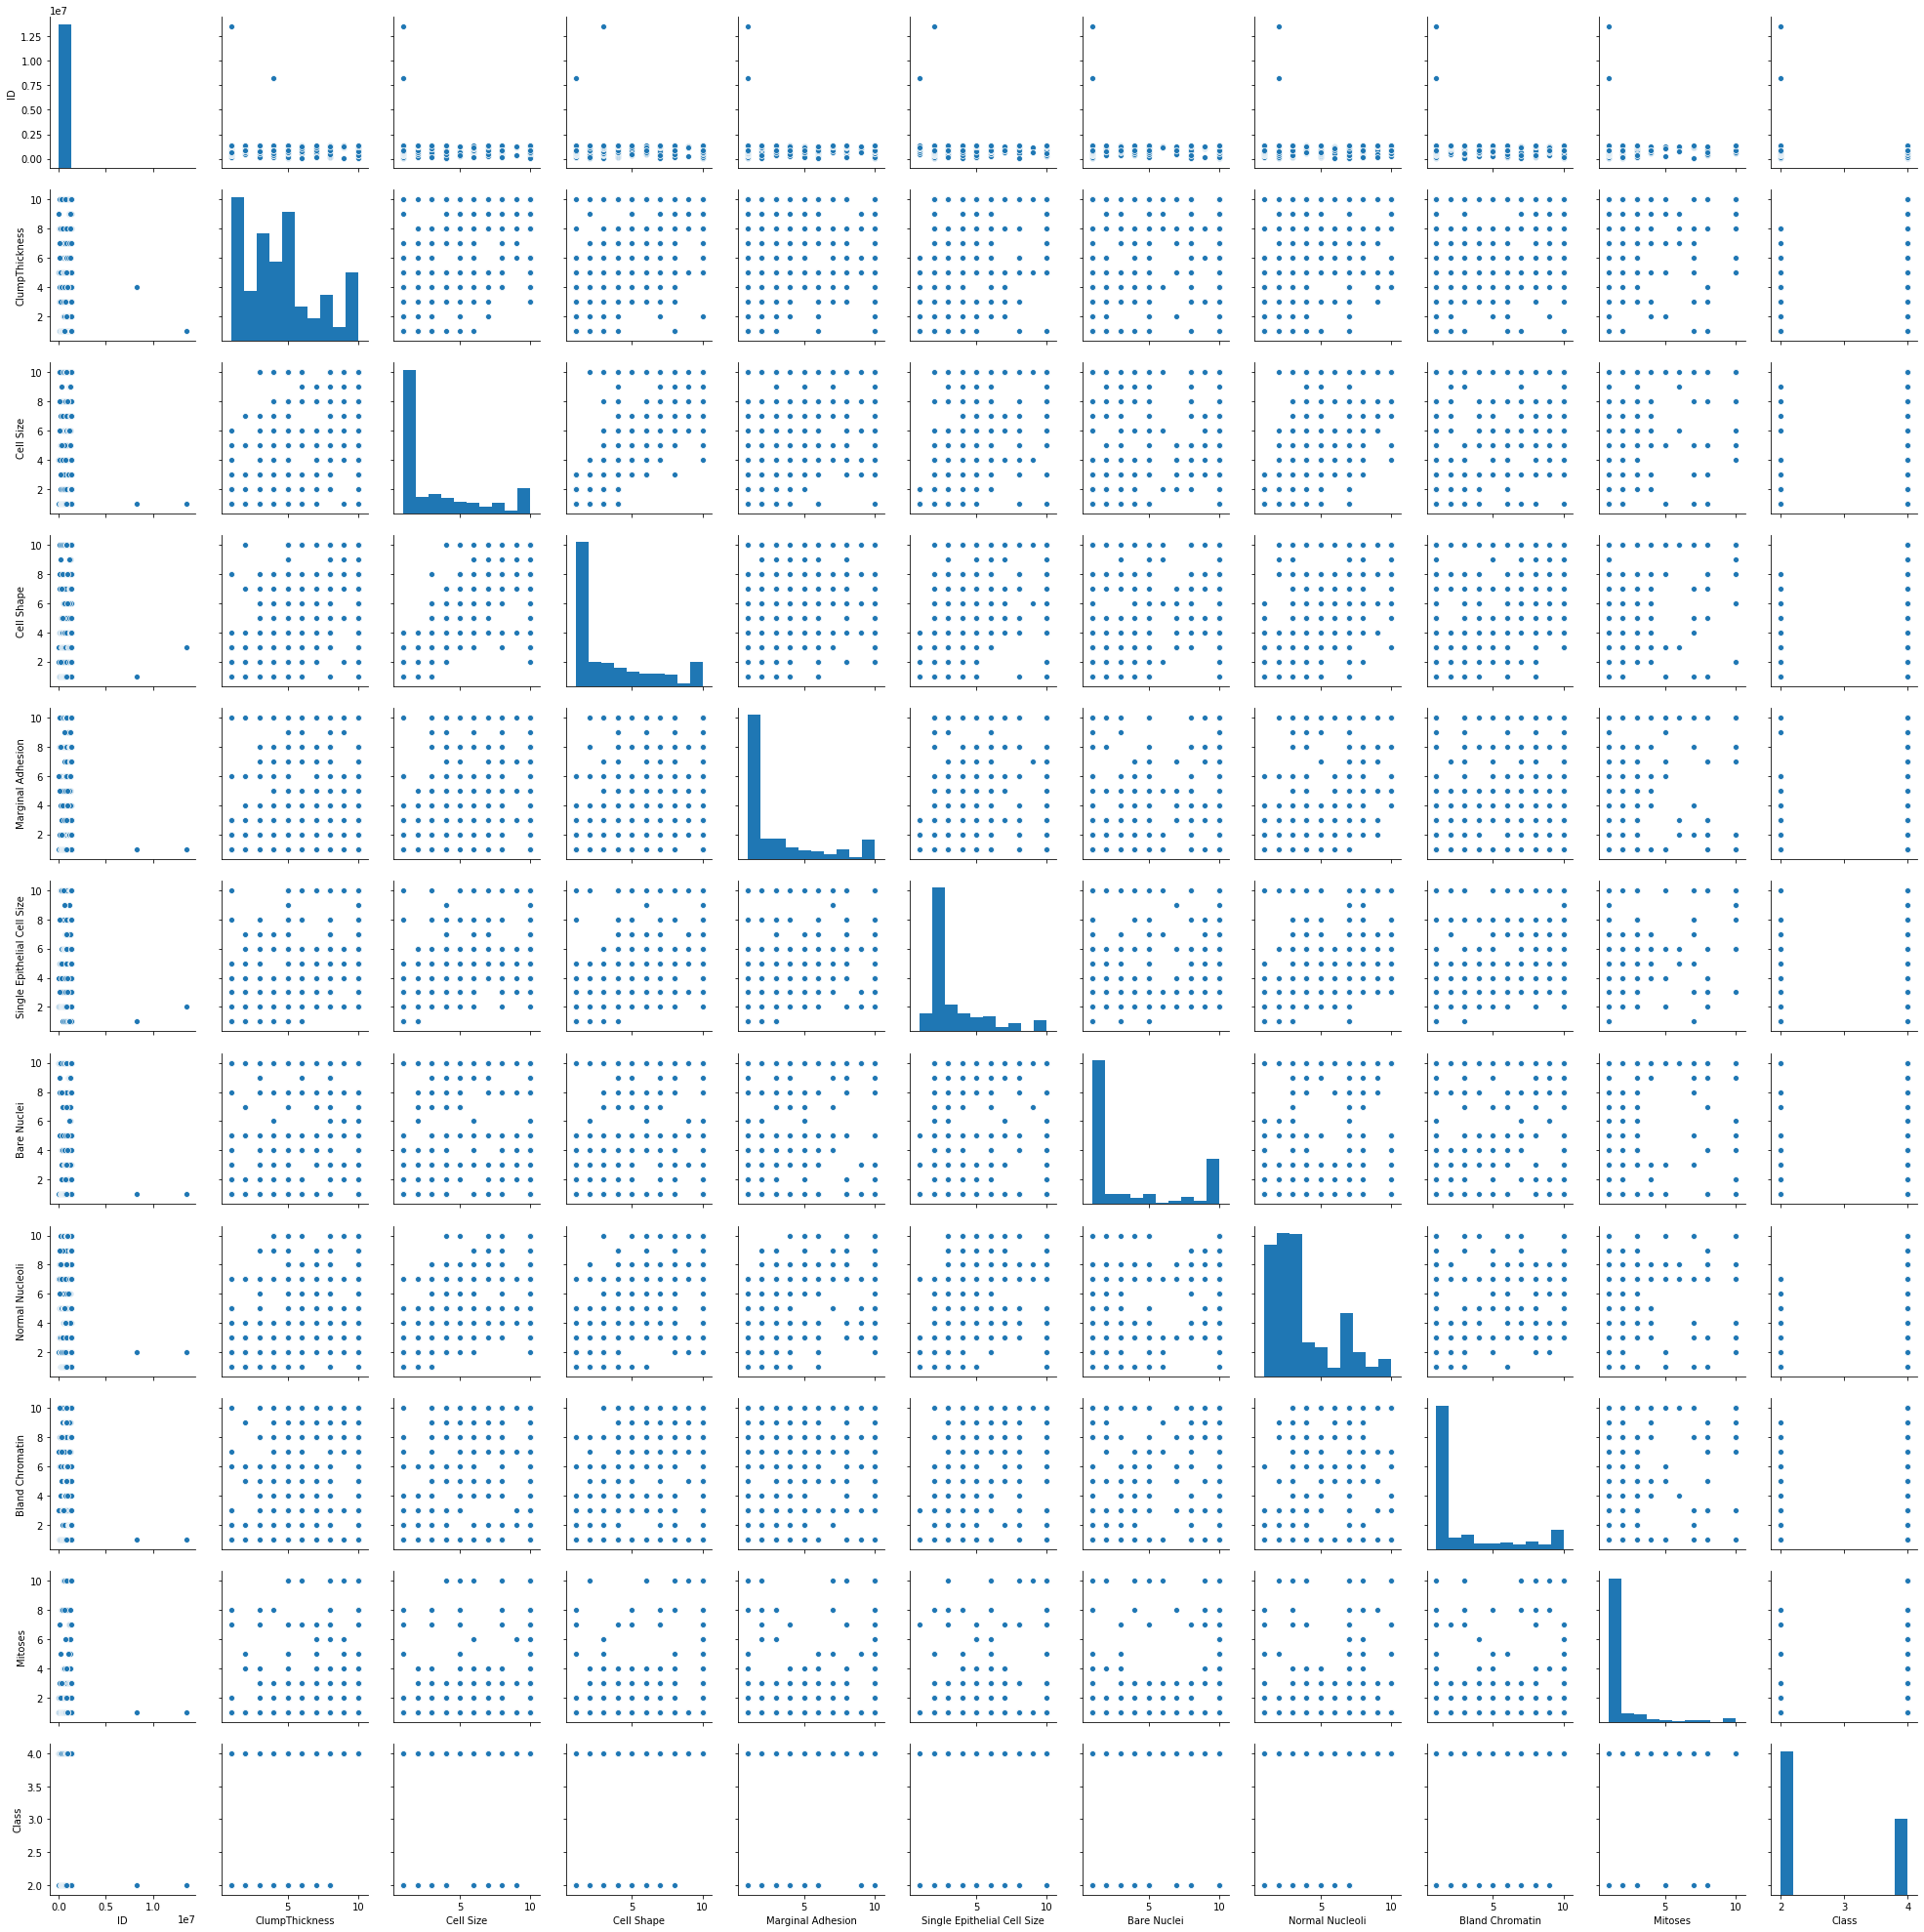

In [46]:
sns.pairplot(bc_df)

In [47]:
#Drop Id column
bc_df = bc_df.drop(['ID'], axis = 1)

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [48]:
X = bc_df.drop(['Class'], axis = 1)
y = bc_df["Class"]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

#### Divide the Training and Test sets in 70:30 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=2)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [52]:
sc=StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [53]:
k_list = [3,5,9]
for k in k_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
    sc=StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_scaled,y_train)
    
    y_pred = knn.predict(X_test_scaled)
    print("K: {}, Test Accuracy Score: {}".format(k,accuracy_score(y_test, y_pred)))

K: 3, Test Accuracy Score: 0.9571428571428572
K: 5, Test Accuracy Score: 0.9642857142857143
K: 9, Test Accuracy Score: 0.9571428571428572


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [55]:
PlotTrainAccuracy = []
PlotTestAccuracy = []
neighbors = []
train_accuracy = {}
test_accuracy = {}
for k in range(1,20):
    if k%2 !=0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
        sc=StandardScaler()
        X_train_scaled = sc.fit_transform(X_train)
        X_test_scaled = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn = knn.fit(X_train_scaled,y_train)
        y_pred = knn.predict(X_test_scaled)
        
        train_accuracy[k] = knn.score(X_train_scaled,y_train)
        test_accuracy[k] = knn.score(X_test_scaled,y_test)
        print("K= {}, Traning Accuracy: {}, Test Accuracy: {}".format(k, knn.score(X_train_scaled,y_train), accuracy_score(y_test, y_pred)))
        
        #Add to list
        #Compute accuracy on the training set
        PlotTrainAccuracy.insert(k, knn.score(X_train_scaled,y_train))
        #Compute accuracy on the testing set
        PlotTestAccuracy.insert(k,accuracy_score(y_test, y_pred))
        neighbors.append(k)

Optimal_k = sorted(test_accuracy.items(), key=lambda kv: kv[1], reverse=True)
print("Optimal Value of K: {}".format(Optimal_k[0][0]))

K= 1, Traning Accuracy: 1.0, Test Accuracy: 0.9428571428571428
K= 3, Traning Accuracy: 0.9785330948121646, Test Accuracy: 0.9571428571428572
K= 5, Traning Accuracy: 0.9713774597495528, Test Accuracy: 0.9642857142857143
K= 7, Traning Accuracy: 0.9695885509838998, Test Accuracy: 0.9571428571428572
K= 9, Traning Accuracy: 0.9677996422182469, Test Accuracy: 0.9571428571428572
K= 11, Traning Accuracy: 0.9660107334525939, Test Accuracy: 0.9571428571428572
K= 13, Traning Accuracy: 0.964221824686941, Test Accuracy: 0.9571428571428572
K= 15, Traning Accuracy: 0.964221824686941, Test Accuracy: 0.9571428571428572
K= 17, Traning Accuracy: 0.962432915921288, Test Accuracy: 0.9571428571428572
K= 19, Traning Accuracy: 0.964221824686941, Test Accuracy: 0.9571428571428572
Optimal Value of K: 5


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

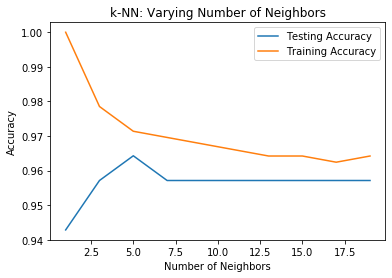

In [56]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, PlotTestAccuracy, label = 'Testing Accuracy')
plt.plot(neighbors, PlotTrainAccuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()